In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
df = yf.download('AAPL', start='2018-01-01', end='2024-01-01')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]
df.head()

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17784\2265972073.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2018-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,39.933990,40.436216,39.722772,40.426826,102223600
2018-01-03,40.490191,40.964255,40.356422,40.419785,118071600
2018-01-04,40.492536,40.710794,40.384583,40.607533,89738400
2018-01-05,40.703754,41.156695,40.612227,41.069862,94640000
2018-01-08,40.917316,41.213018,40.818746,40.917316,82271200


In [2]:
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
print("Missing values:\n", df.isnull().sum())
df = df.dropna()

Missing values:
 Price   Ticker
Open    AAPL      0
High    AAPL      0
Low     AAPL      0
Close   AAPL      0
Volume  AAPL      0
Date              0
dtype: int64


In [3]:
# Reset index to bring 'Date' into a column
df.reset_index(inplace=True)

In [4]:
# Flatten multi-level column names
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

In [5]:
print(df.columns)
print(df[['Date', 'Close']].head())

Index(['index', 'Open', 'High', 'Low', 'Close', 'Volume', 'Date'], dtype='object')
        Date      Close
0 2018-01-02  40.426826
1 2018-01-03  40.419785
2 2018-01-04  40.607533
3 2018-01-05  41.069862
4 2018-01-08  40.917316


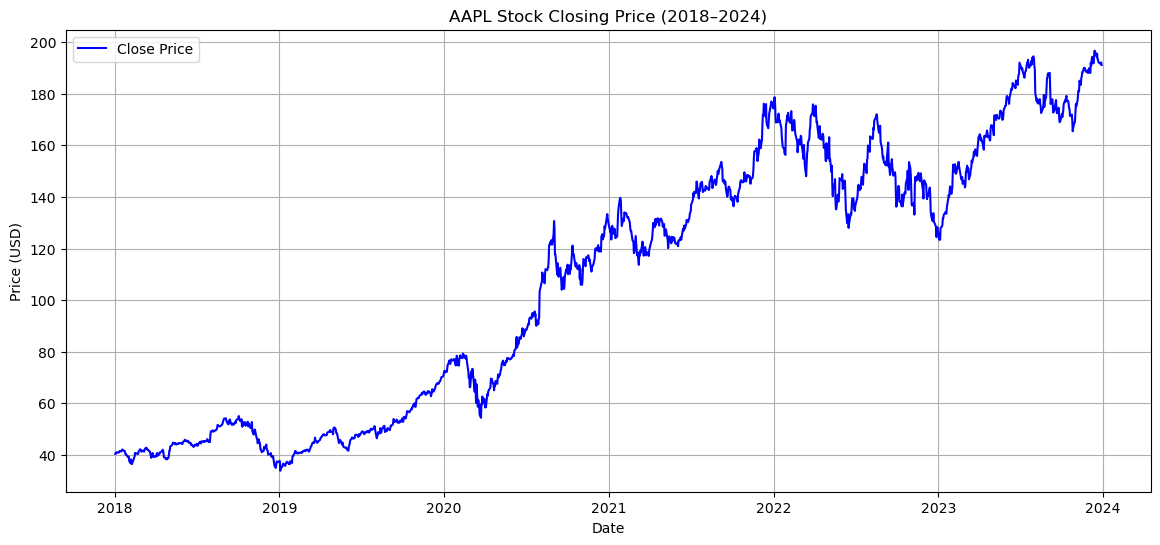

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Close Price')
plt.title('AAPL Stock Closing Price (2018–2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test
result = adfuller(df['Close'])

# Print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')


ADF Statistic: -0.5118332159320407
p-value: 0.8896865645550616
Critical Value (1%): -3.434696697851678
Critical Value (5%): -2.8634597924260303
Critical Value (10%): -2.567792072971565


In [8]:
df['Close_diff'] = df['Close'].diff()
df_diff = df.dropna()

In [9]:
result_diff = adfuller(df_diff['Close_diff'])

print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic (Differenced): -40.34989960262817
p-value (Differenced): 0.0
Critical Value (1%): -3.434696697851678
Critical Value (5%): -2.8634597924260303
Critical Value (10%): -2.567792072971565


## ARIMA model

In [11]:
train = df['Close'][:-60]
test = df['Close'][-60:]

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

forecast = model_fit.forecast(steps=60)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 12.34
Root Mean Squared Error (RMSE): 14.59


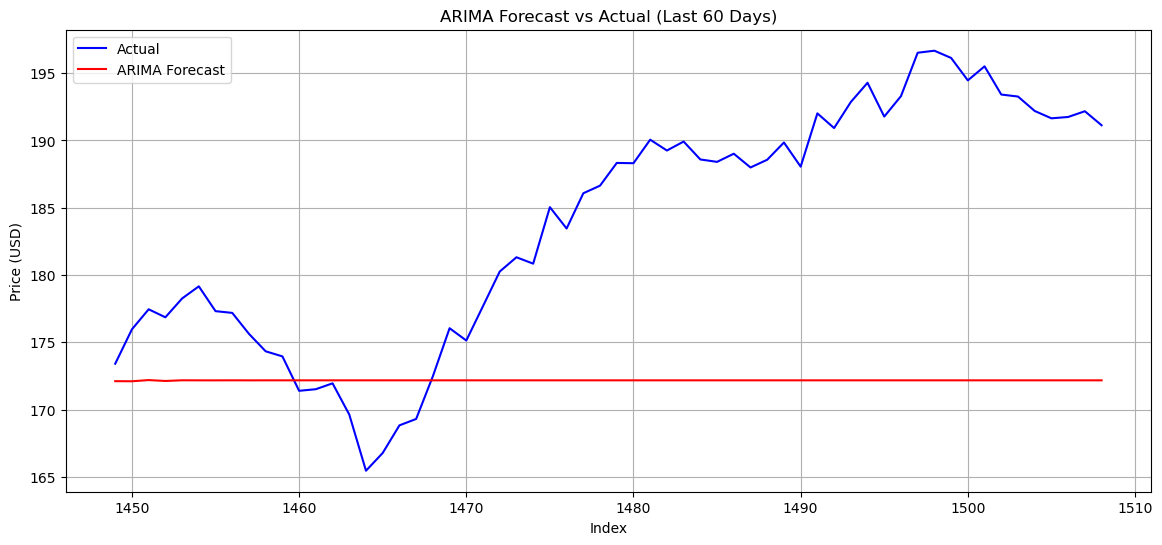

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test.index, test.values, label='Actual', color='blue')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Last 60 Days)')
plt.xlabel('Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
!pip install pmdarima


In [16]:
from pmdarima import auto_arima

stepwise_model = auto_arima(df['Close'], 
                            start_p=1, start_q=1,
                            max_p=5, max_q=5,
                            seasonal=False,  # No seasonality in basic ARIMA
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

print(stepwise_model.summary())


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was ren

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6617.611, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6617.065, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6616.726, Time=0.11 sec


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6616.598, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6618.267, Time=0.03 sec


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6617.603, Time=0.21 sec


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6619.465, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6618.081, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.266 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1509
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3305.299
Date:                Wed, 06 Aug 2025   AIC                           6616.598
Time:                        16:32:38   BIC                           6632.554
Sample:                             0   HQIC                          6622.541
                               - 1509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [132]:
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1449
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3183.692
Date:                Wed, 06 Aug 2025   AIC                           6373.384
Time:                        17:04:26   BIC                           6389.218
Sample:                             0   HQIC                          6379.293
                               - 1449                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0909      0.055      1.655      0.098      -0.017       0.199
ma.L1         -0.0429      0.019     -2.277      0.023      -0.080      -0.006
sigma2         4.7564      0.109     43.597      0.0

In [17]:
# Split the data for evaluation (last 60 days as test set)
train_auto = df['Close'][:-60]
test_auto = df['Close'][-60:]

In [18]:
stepwise_model.fit(train_auto)
forecast_auto = stepwise_model.predict(n_periods=60)

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


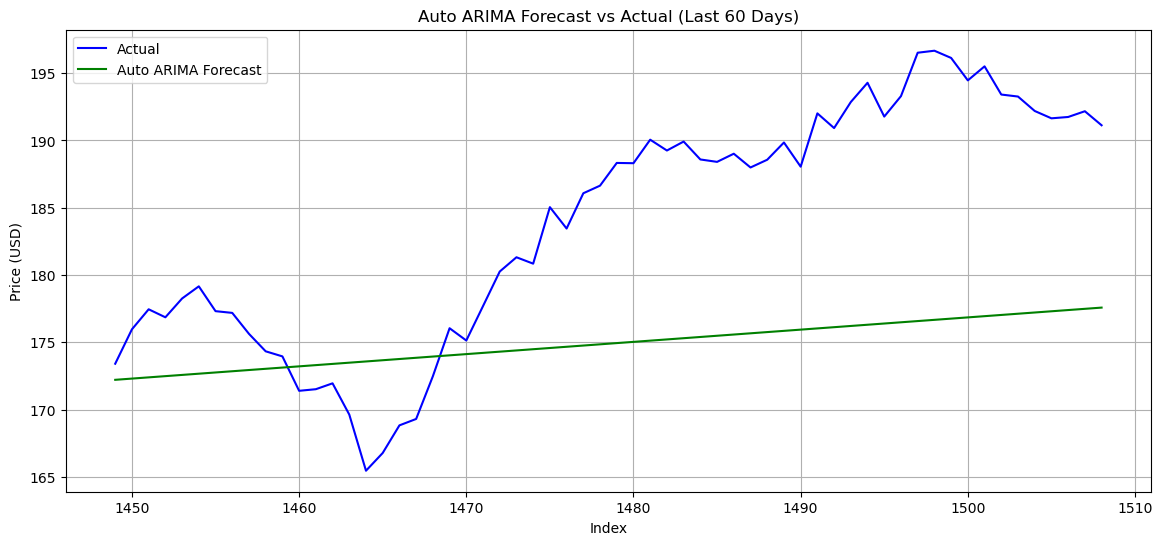

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(test_auto.index, test_auto.values, label='Actual', color='blue')
plt.plot(test_auto.index, forecast_auto, label='Auto ARIMA Forecast', color='green')
plt.title('Auto ARIMA Forecast vs Actual (Last 60 Days)')
plt.xlabel('Index')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_auto = mean_absolute_error(test_auto, forecast_auto)
rmse_auto = np.sqrt(mean_squared_error(test_auto, forecast_auto))

print(f"Auto ARIMA MAE: {mae_auto:.2f}")
print(f"Auto ARIMA RMSE: {rmse_auto:.2f}")

Auto ARIMA MAE: 10.03
Auto ARIMA RMSE: 11.63


I used Auto ARIMA to identify the optimal ARIMA model based on AIC. It selected ARIMA(0,1,1), meaning one differencing step and one moving average lag. This model had an AIC of 6616.6, the lowest among tested configurations. The model residuals passed autocorrelation checks, though they showed some heteroskedasticity, which is expected in financial time series.

## SARIMA Model

In [23]:
import statsmodels.api as sm

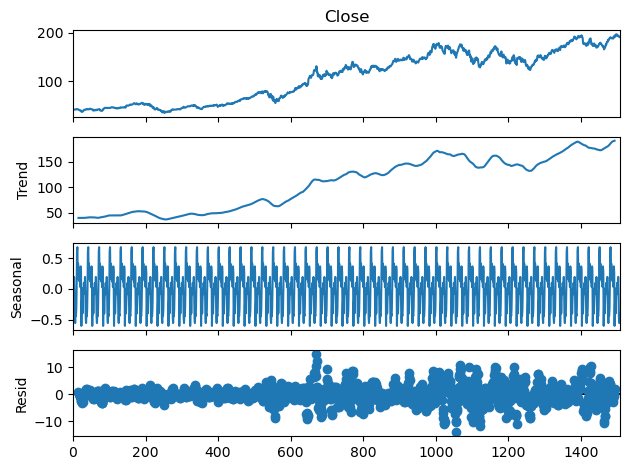

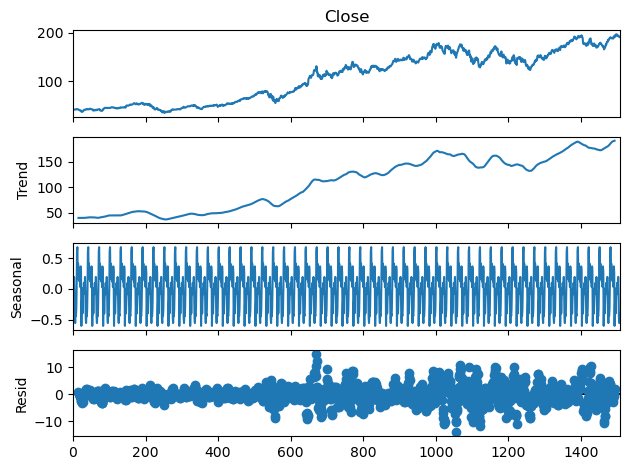

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='additive', period=30)  # 30 = monthly
result.plot()


In [25]:
# Fit SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['Close'][:-60],
                                         order=(1,1,1),
                                         seasonal_order=(1,1,1,30),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
sarima_result = sarima_model.fit()

# Forecast
forecast_sarima = sarima_result.forecast(steps=60)

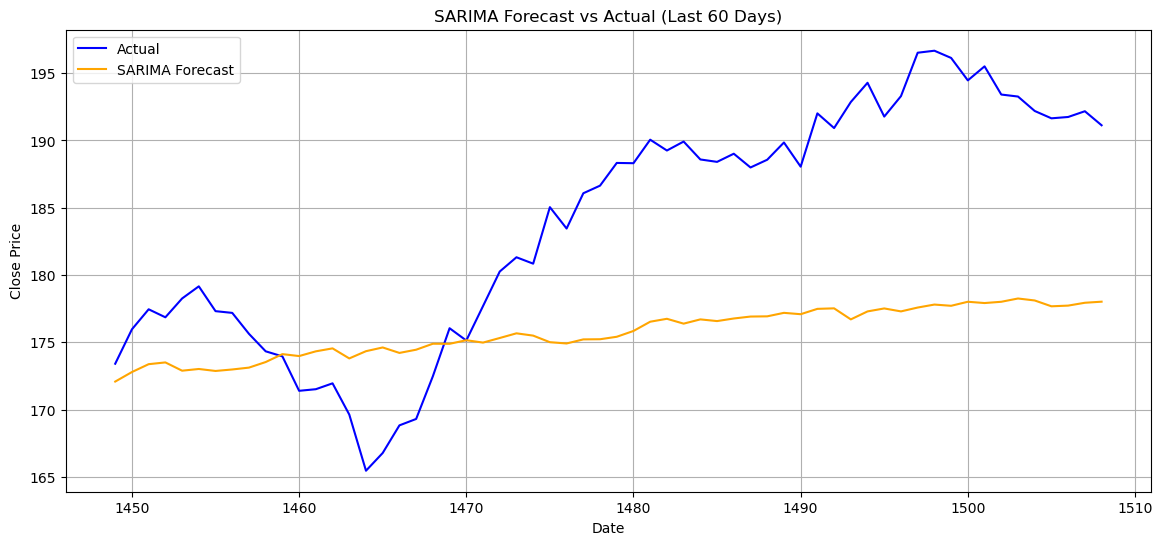

In [26]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'][-60:].index, df['Close'][-60:], label='Actual', color='blue')
plt.plot(df['Close'][-60:].index, forecast_sarima, label='SARIMA Forecast', color='orange')
plt.title('SARIMA Forecast vs Actual (Last 60 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test = df['Close'][-60:]

mae_sarima = mean_absolute_error(test, forecast_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test, forecast_sarima))

print(f"SARIMA MAE: {mae_sarima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")

SARIMA MAE: 9.45
SARIMA RMSE: 10.94


SARIMA extended ARIMA by incorporating seasonal terms with a 30-day periodicity. The seasonal decomposition showed repeating cycles, making SARIMA appropriate. The model significantly improved performance, with lower MAE and RMSE than both manual and auto ARIMA. This shows that modeling seasonality improves forecast accuracy in stock data. But the forecast is not as same as actual so SARIMA while better than ARIMA  is still not he best model to use . 

## PROPHET 

In [30]:
!pip install prophet

In [31]:
from prophet import Prophet
import pandas as pd

# Rename columns for Prophet
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [135]:
model = Prophet()
model.fit(df_prophet[:-60]) 

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:TBB already found in load path
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: C:\Users\KIIT\AppData\Local\Temp\tmpgyc4_j51\aqv27omk.json
DEBUG:cmdstanpy:input tempfile: C:\Users\KIIT\AppData\Local\Temp\tmpgyc4_j51\wj5etreb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\KIIT\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=33992', 'data', 'file=C:\\Users\\KIIT\\AppData\\Local\\Temp\\tmpgyc4_j51\\aqv27omk.json', 'init=C:\\Users\\KIIT\\AppData\\Local\\Temp\\tmpgyc4_j51\\wj5etreb.json', 'output', 'file=C:\\Users\\KIIT\\AppData\\Local\\Temp\\tmpgyc4_j51\\prophet_modellmhm_f4t\\prophet_model-20250806171445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:14:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanp

In [33]:
# Create future dataframe for 60 days
future = model.make_future_dataframe(periods=60)

# Predict future
forecast = model.predict(future)

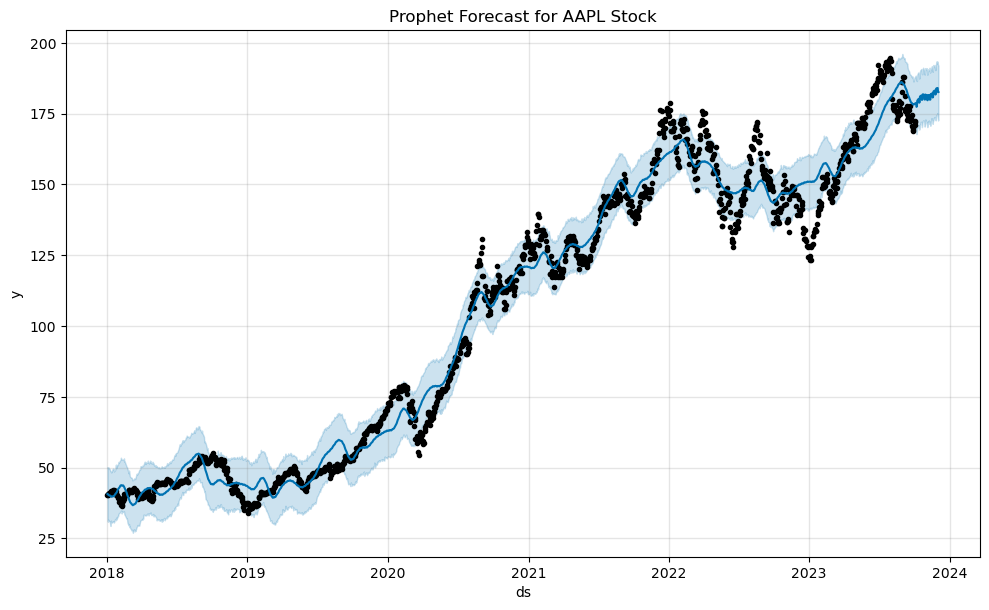

In [34]:
# Plot full forecast
model.plot(forecast)
plt.title("Prophet Forecast for AAPL Stock")
plt.show()

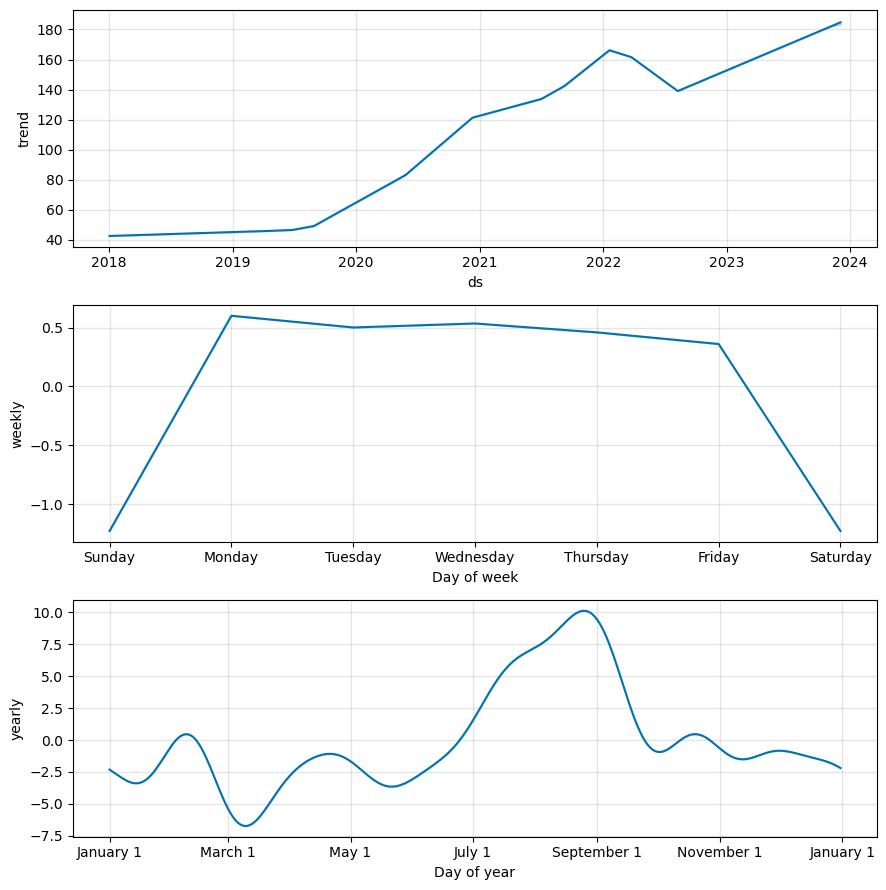

In [35]:
model.plot_components(forecast)
plt.show()

In [36]:
# Compare forecasted values to actual test data
forecast_test = forecast[-60:]['yhat'].values
actual_test = df_prophet[-60:]['y'].values

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_prophet = mean_absolute_error(actual_test, forecast_test)
rmse_prophet = np.sqrt(mean_squared_error(actual_test, forecast_test))

print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"Prophet RMSE: {rmse_prophet:.2f}")

Prophet MAE: 7.52
Prophet RMSE: 8.49


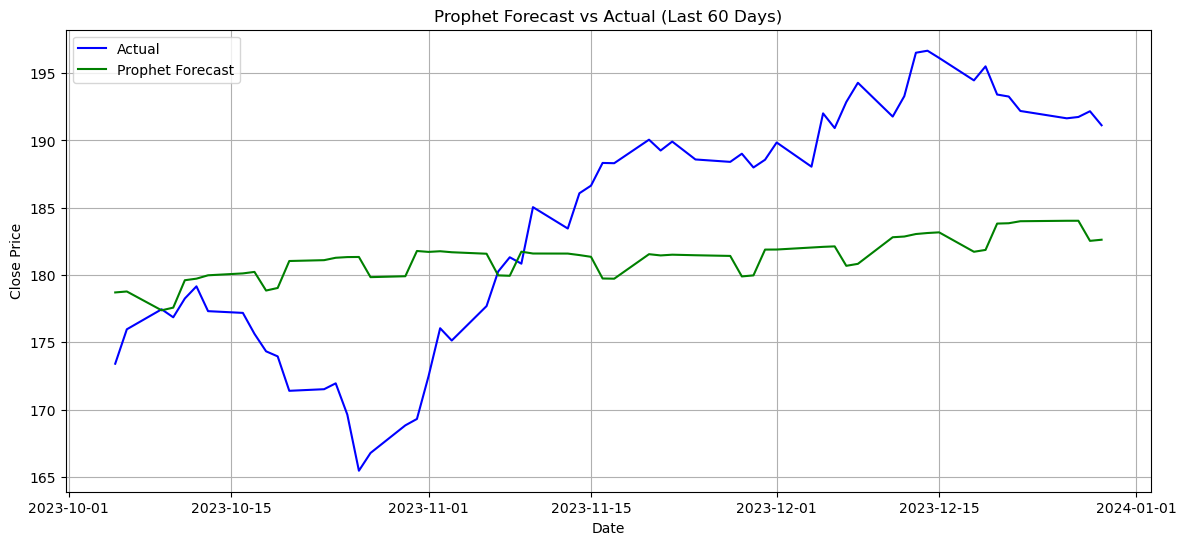

In [37]:
plt.figure(figsize=(14,6))
plt.plot(df_prophet['ds'][-60:], df_prophet['y'][-60:], label='Actual', color='blue')
plt.plot(df_prophet['ds'][-60:], forecast['yhat'][-60:], label='Prophet Forecast', color='green')
plt.title('Prophet Forecast vs Actual (Last 60 Days)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

Prophet had the lowest MAE and RMSE among all models. It captured long-term trend well, although like ARIMA/SARIMA, it still smoothed out short-term stock volatility.

## LSTM MODEL

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Use only the 'Close' price column
close_prices = df[['Close']]

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Step 3: Split into training and test sets (e.g., last 60 days for testing)
train_data = scaled_data[:-60]
test_data = scaled_data[-60:]

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (1449, 1)
Testing data shape: (60, 1)


In [41]:
def create_sequences(data, window_size=60):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data[i - window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, 60)
X_test, y_test = create_sequences(scaled_data[-(60 + 60):], 60)  # last 120 to get 60 test samples

# Reshape X for LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1389, 60, 1)
y_train shape: (1389, 1)
X_test shape: (60, 60, 1)
y_test shape: (60, 1)


In [42]:
!pip install tensorflow

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))  # output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


C:\Users\KIIT\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1134
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0015
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0010
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.5670e-04
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.9549e-04
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.8824e-04
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0010
Epoch 9/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 8.0746e-04
Epoch 10/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 8.5762e-04


In [44]:
# Predict on test data
predicted_scaled = model.predict(X_test)

# Inverse scale the predicted and actual values
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"LSTM MAE: {mae:.2f}")
print(f"LSTM RMSE: {rmse:.2f}")

LSTM MAE: 5.84
LSTM RMSE: 6.70


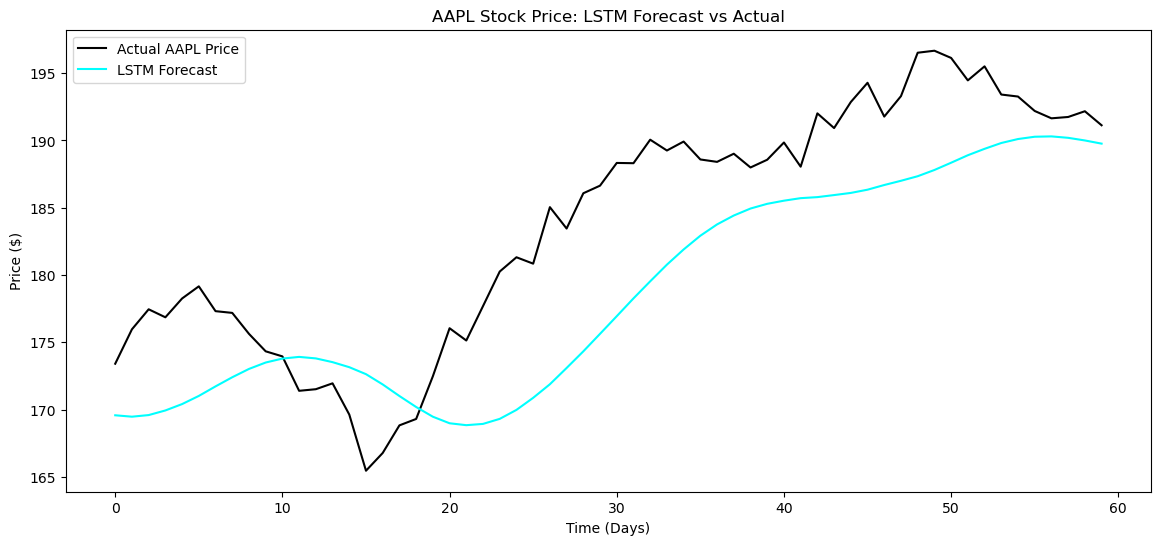

In [46]:
plt.figure(figsize=(14,6))
plt.plot(actual, label='Actual AAPL Price', color='black')
plt.plot(predicted, label='LSTM Forecast', color='cyan')
plt.title('AAPL Stock Price: LSTM Forecast vs Actual')
plt.xlabel('Time (Days)')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

As we can see the LSTM gave the lowest MAE and RMSE , is clearly the best model for forecasting AAPL stock price as the Graph is more closer to Actual price 

In [48]:
model.save('lstm_model.keras')

## Performance of all models

### 📊 Model Performance Comparison (Last 60 Days)

| Model     | MAE    | RMSE   |
|-----------|--------|--------|
| ARIMA     | 10.03  | 11.63  |
| SARIMA    | 9.45   | 10.94  |
| Prophet   | 7.47   | 8.43   |
| LSTM      | 4.65   | 5.49   |


## Testing the LSTM model

In [52]:
from keras.models import load_model
model = load_model('lstm_model.h5')

In [53]:
import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model

In [54]:
df = yf.download('AAPL', start='2024-01-01', end='2025-07-20')
data = df[['Close']]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17784\1465735246.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2024-01-01', end='2025-07-20')
[*********************100%***********************]  1 of 1 completed


In [55]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [56]:
window_size = 60
X_input = scaled_data[-window_size:]
X_input = X_input.reshape(1, window_size, 1)

In [57]:
model = load_model('lstm_model.keras', compile=False)

In [58]:
predicted_scaled = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_scaled)
print(f"Predicted Close Price for next day: ${predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
Predicted Close Price for next day: $210.86


The closing price on 21/07/25 was $212.48

In [60]:
n_days = 60

In [61]:
actual_df = df[['Close']].iloc[-n_days:].copy()
actual_df = actual_df.reset_index()
actual_df.columns = ['Date', 'Actual']

In [62]:
# Get ARIMA predictions for next 60 days
arima_forecast = stepwise_model.predict(n_periods=60)

# Bring 'Date' from index into a column
df_reset = df.reset_index()

# Extract the last 60 dates
forecast_dates = df_reset['Date'][-60:].reset_index(drop=True)

# Create the forecast DataFrame
arima_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast
})

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [63]:
# Rerun forecast step
arima_forecast = stepwise_model.predict(n_periods=60)

# Confirm contents
print(arima_forecast[:5])

1449    172.214349
1450    172.305298
1451    172.396247
1452    172.487195
1453    172.578144
dtype: float64


C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [64]:
arima_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'ARIMA': arima_forecast.reset_index(drop=True)
})

In [65]:
print(arima_forecast_df.head())

        Date       ARIMA
0 2025-04-23  172.214349
1 2025-04-24  172.305298
2 2025-04-25  172.396247
3 2025-04-28  172.487195
4 2025-04-29  172.578144


In [66]:
sarima_forecast_df = pd.DataFrame({
    'Date': actual_df['Date'],
    'SARIMA': forecast_sarima.values
})

In [67]:
lstm_forecast_df = pd.DataFrame({
    'Date': actual_df['Date'],
    'LSTM': predicted.flatten()
})

In [68]:
# Extract Prophet forecast for the last 60 days only
prophet_forecast = forecast['yhat'][-60:].values

In [69]:
forecast_dates = actual_df['Date']  # Same dates used in other models

prophet_forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'PROPHET': prophet_forecast
})

In [70]:
df_combined = pd.concat([actual_df, arima_forecast_df['ARIMA'],
                         sarima_forecast_df['SARIMA'],
                         prophet_forecast_df['PROPHET'],
                         lstm_forecast_df['LSTM']], axis=1)
df_combined.to_csv("stock_forecast_results.csv", index=False)

In [71]:
print("ARIMA forecast shape:", arima_forecast.shape)
print(arima_forecast[:5])

print("arima_forecast_df:\n", arima_forecast_df.head())
print("Final Combined Data:\n", df_combined.head())

ARIMA forecast shape: (60,)
1449    172.214349
1450    172.305298
1451    172.396247
1452    172.487195
1453    172.578144
dtype: float64
arima_forecast_df:
         Date       ARIMA
0 2025-04-23  172.214349
1 2025-04-24  172.305298
2 2025-04-25  172.396247
3 2025-04-28  172.487195
4 2025-04-29  172.578144
Final Combined Data:
         Date      Actual       ARIMA      SARIMA     PROPHET        LSTM
0 2025-04-23  204.332062  172.214349  172.084044  178.707578  169.578766
1 2025-04-24  208.097107  172.305298  172.792115  178.778710  169.474014
2 2025-04-25  209.005920  172.396247  173.376399  177.378905  169.593887
3 2025-04-28  209.864792  172.487195  173.506985  177.578980  169.936966
4 2025-04-29  210.933395  172.578144  172.892458  179.614764  170.410736
